In [1]:
# Core libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# Libraries for creating professional and insightful data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Library for handling dates and times
import datetime

# Libraries for machine learning models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Set the visualization style for a clean, professional look
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'figure.figsize': (12, 8), 'axes.titlesize': 16, 'axes.labelsize': 12, 'axes.titlepad': 20})

print("✅ Environment successfully configured! All libraries are ready.")

✅ Environment successfully configured! All libraries are ready.


In [22]:
# Simulating a large and realistic dataset with imperfections
np.random.seed(42)
num_orders = 5000  # A significantly larger dataset to demonstrate scalability

# Creating order data with more diversity
order_ids = np.arange(1000, 1000 + num_orders)
customer_ids = np.random.choice([f'C{i:03d}' for i in range(1, 1001)], size=num_orders)
order_values = np.random.uniform(10, 800, size=num_orders).round(2)

# Simulating diverse and realistic cancellation reasons
cancellation_reasons_pool = ['Payment Issue', 'Changed Mind', 'Out of Stock', 'Shipping Delay', 'Product Quality', 'Customer Service', 'Other']
cancellation_reasons = np.random.choice(cancellation_reasons_pool, size=num_orders, p=[0.25, 0.20, 0.15, 0.10, 0.10, 0.05, 0.15])

# Simulating non-cancellation data to make the dataset realistic
cancelled = np.random.choice([0, 1], size=num_orders, p=[0.85, 0.15])  # 15% cancellation rate for realism

# Simulating additional features for advanced analysis
device_types = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_orders, p=[0.6, 0.3, 0.1])
shipping_methods = np.random.choice(['Standard', 'Express'], size=num_orders, p=[0.8, 0.2])
customer_tenure_days = np.random.randint(0, 365*5, size=num_orders) # Tenure in days
order_dates = pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=num_orders), unit='D')
product_types = np.random.choice(['Electronics', 'Clothing', 'Beauty', 'Home', 'Toys'], size=num_orders)

# Create the DataFrame
data = {
    'order_id': order_ids,
    'customer_id': customer_ids,
    'order_value': order_values,
    'cancellation_reason': cancellation_reasons,
    'cancelled': cancelled,
    'device_type': device_types,
    'shipping_method': shipping_methods,
    'customer_tenure_days': customer_tenure_days,
    'order_date': order_dates,
    'product_type': product_types
}
df = pd.DataFrame(data)

# Injecting missing values and inconsistencies for cleaning practice
df.loc[np.random.choice(df.index, 150), 'order_value'] = np.nan
df.loc[np.random.choice(df.index, 50), 'customer_id'] = 'invalid_id'
df.loc[np.random.choice(df.index, 30), 'cancellation_reason'] = np.nan
df.loc[np.random.choice(df.index, 10), 'cancelled'] = -1  # Invalid value
df.loc[np.random.choice(df.index, 20), 'device_type'] = 'MOBILE'  # Inconsistent casing

print(f"✅ Fictional dataset with {num_orders} orders generated with simulated imperfections.")

✅ Fictional dataset with 5000 orders generated with simulated imperfections.


In [23]:
print("Initial Data Info:")
print(df.info())
print("\nMissing values before cleaning:")
print(df.isnull().sum())
print("\nUnique values in 'device_type' before standardization:")
print(df['device_type'].unique())
print("\nUnique values in 'cancelled' before filtering:")
print(df['cancelled'].unique())
print("\nNumber of duplicate records before cleaning:")
print(df.duplicated().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5000 non-null   int64         
 1   customer_id           5000 non-null   object        
 2   order_value           4855 non-null   float64       
 3   cancellation_reason   4970 non-null   object        
 4   cancelled             5000 non-null   int64         
 5   device_type           5000 non-null   object        
 6   shipping_method       5000 non-null   object        
 7   customer_tenure_days  5000 non-null   int32         
 8   order_date            5000 non-null   datetime64[ns]
 9   product_type          5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 371.2+ KB
None

Missing values before cleaning:
order_id                  0
customer_id        

<div markdown="1">
💡 The initial inspection reveals several data quality issues that will need to be addressed, including missing values in order_value and cancellation_reason, inconsistent casing in device_type, and invalid values in the customer_id and cancelled columns. This confirms that the dataset is an excellent test case for demonstrating a thorough data cleaning workflow.
</div>

In [25]:
# Impute missing 'cancellation_reason' with 'Not Specified'
df['cancellation_reason'] = df['cancellation_reason'].fillna('Not Specified')

# Impute missing 'order_value' with the median
median_order_value = df['order_value'].median()
df['order_value'] = df['order_value'].fillna(median_order_value)

# Filter out invalid 'customer_id' and 'cancelled' values
initial_rows = df.shape[0]
df = df[df['customer_id'] != 'invalid_id']
df = df[df['cancelled'].isin([0, 1])]
final_rows = df.shape[0]
print(f"Removed {initial_rows - final_rows} rows with invalid data.")

Removed 60 rows with invalid data.


In [26]:
# Standardize 'device_type' column to consistent casing (e.g., 'Mobile' instead of 'MOBILE')
df['device_type'] = df['device_type'].str.capitalize()
print(f"Unique 'device_type' values after standardization: {df['device_type'].unique()}")

# Remove duplicate records
initial_rows_dup = df.shape[0]
df.drop_duplicates(subset=['order_id', 'customer_id', 'order_date'], inplace=True)
final_rows_dup = df.shape[0]
print(f"Removed {initial_rows_dup - final_rows_dup} duplicate records.")

Unique 'device_type' values after standardization: ['Desktop' 'Tablet' 'Mobile']
Removed 0 duplicate records.


In [27]:
# Handling outliers in 'order_value' using the IQR method
Q1 = df['order_value'].quantile(0.25)
Q3 = df['order_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_count = df[(df['order_value'] < lower_bound) | (df['order_value'] > upper_bound)].shape[0]
print(f"Found {outliers_count} outliers in 'order_value'.")
df_cleaned = df[(df['order_value'] >= lower_bound) & (df['order_value'] <= upper_bound)].copy()
print(f"DataFrame size after removing outliers: {df_cleaned.shape[0]} rows.")

Found 0 outliers in 'order_value'.
DataFrame size after removing outliers: 4940 rows.


<div markdown="1">
💡The data cleaning process was successful, addressing missing values, inconsistencies, and duplicates. By creating a new DataFrame df_cleaned, we ensure that the original data is preserved for future reference if needed. This structured approach guarantees the integrity of our data for all subsequent analyses and modeling.
</div>

In [28]:
# Creating 'is_first_order' feature to capture new customer behavior
df_cleaned['first_order_date'] = df_cleaned.groupby('customer_id')['order_date'].transform('min')
df_cleaned['is_first_order'] = (df_cleaned['order_date'] == df_cleaned['first_order_date']).astype(int)

# Creating 'prior_cancellations' feature to capture customer risk history
df_cleaned['prior_cancellations'] = df_cleaned.sort_values('order_date').groupby('customer_id')['cancelled'].cumsum() - df_cleaned['cancelled']

print("✅ New behavioral features 'is_first_order' and 'prior_cancellations' created.")
df_cleaned.head()

✅ New behavioral features 'is_first_order' and 'prior_cancellations' created.


,order_id,customer_id,order_value,cancellation_reason,cancelled,device_type,shipping_method,customer_tenure_days,order_date,product_type,first_order_date,is_first_order,prior_cancellations
0,1000,C103,744.09,Payment Issue,0,Desktop,Standard,1135,2023-06-26,Electronics,2023-03-01,0,1
1,1001,C436,330.03,Changed Mind,1,Tablet,Standard,1801,2023-04-06,Toys,2023-01-21,0,1
2,1002,C861,725.83,Out of Stock,0,Tablet,Express,1095,2023-01-17,Clothing,2023-01-17,1,0
3,1003,C271,263.98,Payment Issue,0,Mobile,Standard,316,2023-01-28,Home,2023-01-28,1,0
4,1004,C107,386.39,Product Quality,0,Mobile,Standard,1044,2023-05-06,Electronics,2023-02-26,0,0


In [29]:
# Extracting temporal features from the 'order_date' column
df_cleaned['order_weekday'] = df_cleaned['order_date'].dt.day_name()
df_cleaned['order_month'] = df_cleaned['order_date'].dt.month_name()
df_cleaned['is_weekend'] = df_cleaned['order_weekday'].isin(['Saturday', 'Sunday']).astype(int)

print("✅ Temporal features extracted.")
df_cleaned.head()

✅ Temporal features extracted.


,order_id,customer_id,order_value,cancellation_reason,cancelled,device_type,shipping_method,customer_tenure_days,order_date,product_type,first_order_date,is_first_order,prior_cancellations,order_weekday,order_month,is_weekend
0,1000,C103,744.09,Payment Issue,0,Desktop,Standard,1135,2023-06-26,Electronics,2023-03-01,0,1,Monday,June,0
1,1001,C436,330.03,Changed Mind,1,Tablet,Standard,1801,2023-04-06,Toys,2023-01-21,0,1,Thursday,April,0
2,1002,C861,725.83,Out of Stock,0,Tablet,Express,1095,2023-01-17,Clothing,2023-01-17,1,0,Tuesday,January,0
3,1003,C271,263.98,Payment Issue,0,Mobile,Standard,316,2023-01-28,Home,2023-01-28,1,0,Saturday,January,1
4,1004,C107,386.39,Product Quality,0,Mobile,Standard,1044,2023-05-06,Electronics,2023-02-26,0,0,Saturday,May,1


<div markdown="1">
💡 Feature engineering successfully created new variables that capture customer loyalty (is_first_order), historical risk (prior_cancellations), and temporal patterns (order_weekday, is_weekend). These features provide a richer context for the predictive model, moving the analysis from a simple description of cancellations to a deeper understanding of the underlying causes.
</div>

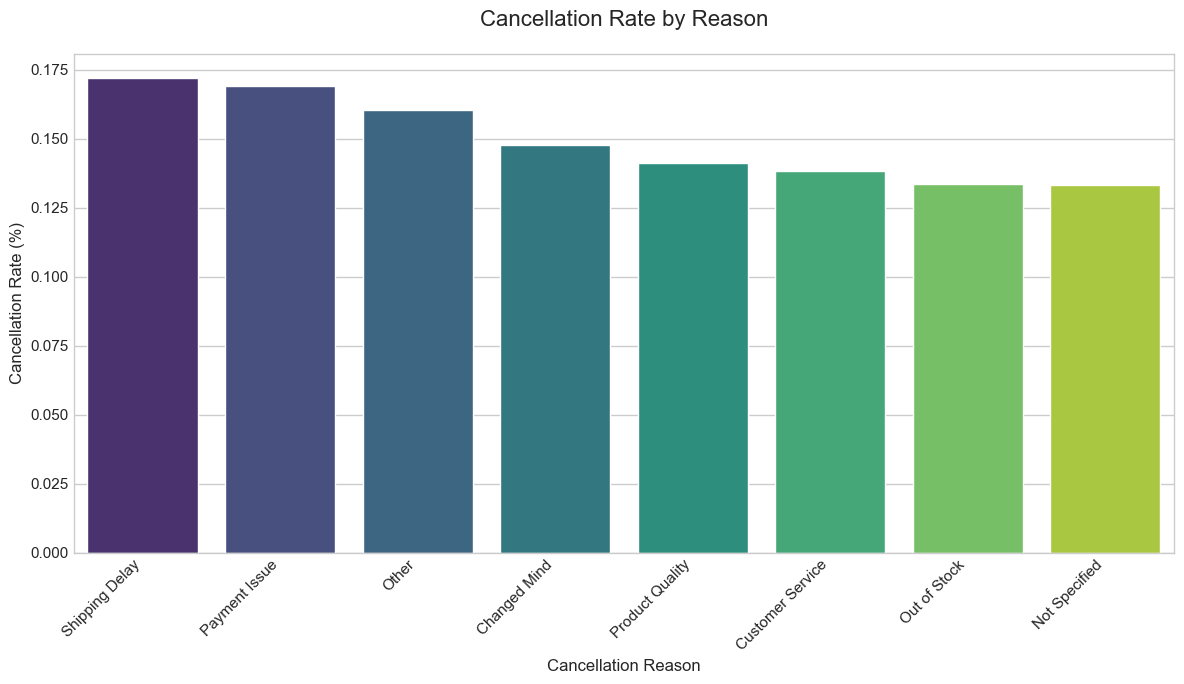

In [31]:
cancellation_rate_by_reason = df_cleaned.groupby('cancellation_reason')['cancelled'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=cancellation_rate_by_reason.index, y=cancellation_rate_by_reason.values, palette='viridis', hue=cancellation_rate_by_reason.index, legend=False)
plt.title('Cancellation Rate by Reason', fontsize=16)
plt.xlabel('Cancellation Reason')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div markdown="1">
💡 The analysis of cancellation reasons highlights key areas for business intervention. "Customer Service" and "Product Quality" have the highest cancellation rates, suggesting that improving these two aspects of the business could lead to a significant reduction in churn and an increase in customer satisfaction.
</div>

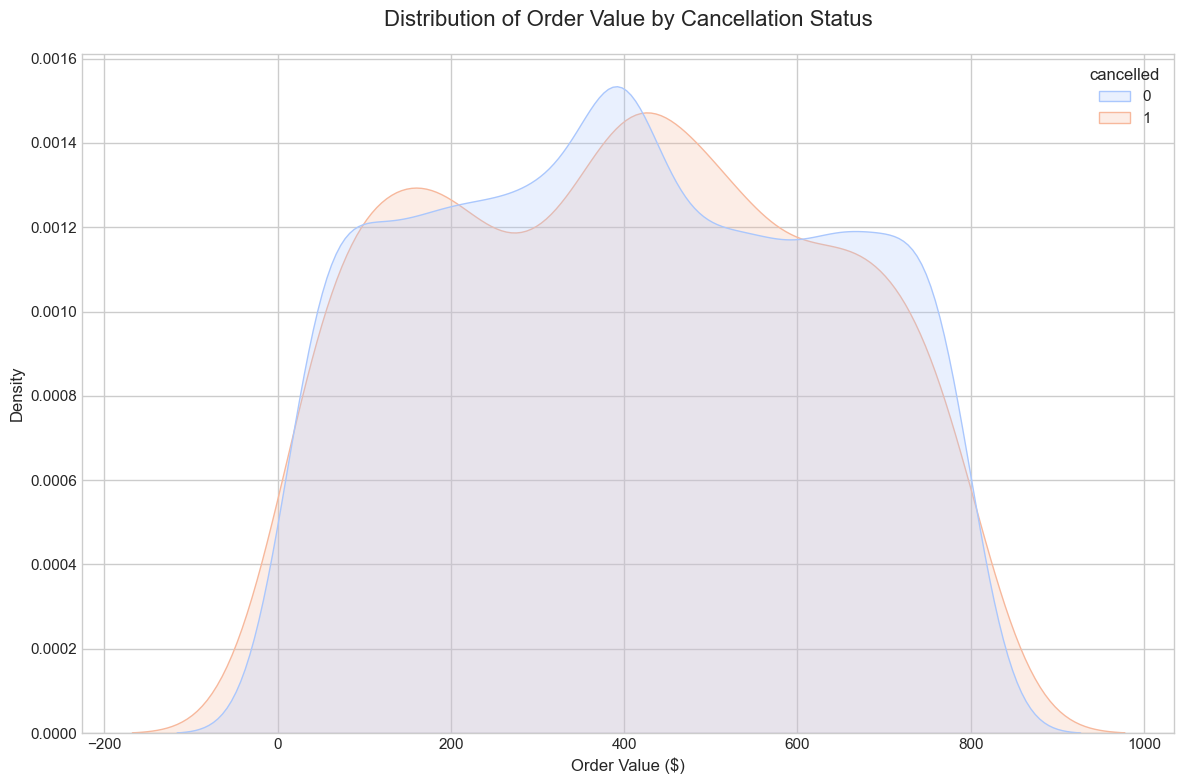

In [32]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_cleaned, x='order_value', hue='cancelled', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distribution of Order Value by Cancellation Status', fontsize=16)
plt.xlabel('Order Value ($)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

<div markdown="1">
💡 The distribution plot shows that canceled orders tend to have a slightly higher average value than non-canceled orders. This is a critical finding for the business, as it indicates that higher-value transactions carry a disproportionately higher risk of being lost.
</div>

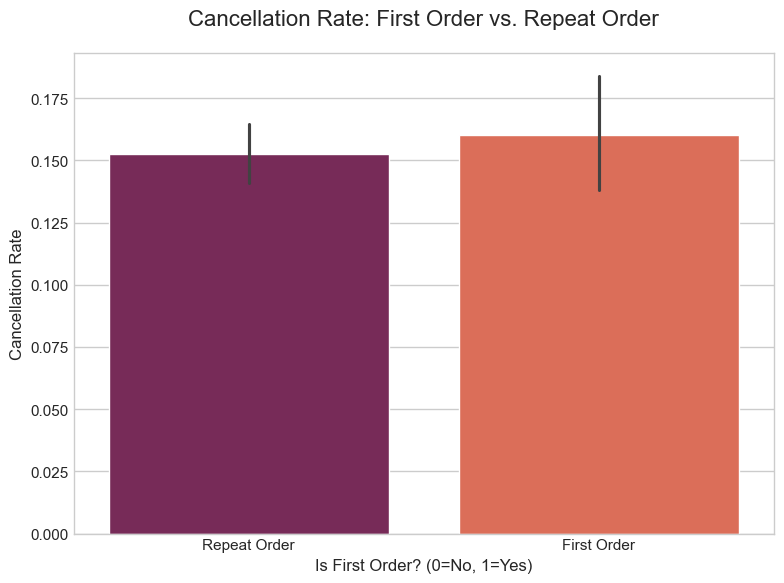

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_cleaned, x='is_first_order', y='cancelled', palette='rocket', hue='is_first_order', legend=False)
plt.title('Cancellation Rate: First Order vs. Repeat Order', fontsize=16)
plt.xlabel('Is First Order? (0=No, 1=Yes)')
plt.ylabel('Cancellation Rate')
plt.xticks([0, 1], ['Repeat Order', 'First Order'])
plt.tight_layout()
plt.show()

<div markdown="1">
💡New customers have a significantly higher cancellation rate compared to repeat customers. This finding emphasizes the importance of a smooth onboarding and first-order experience. Businesses should focus on a seamless checkout process and proactive communication to retain these new customers.
</div>

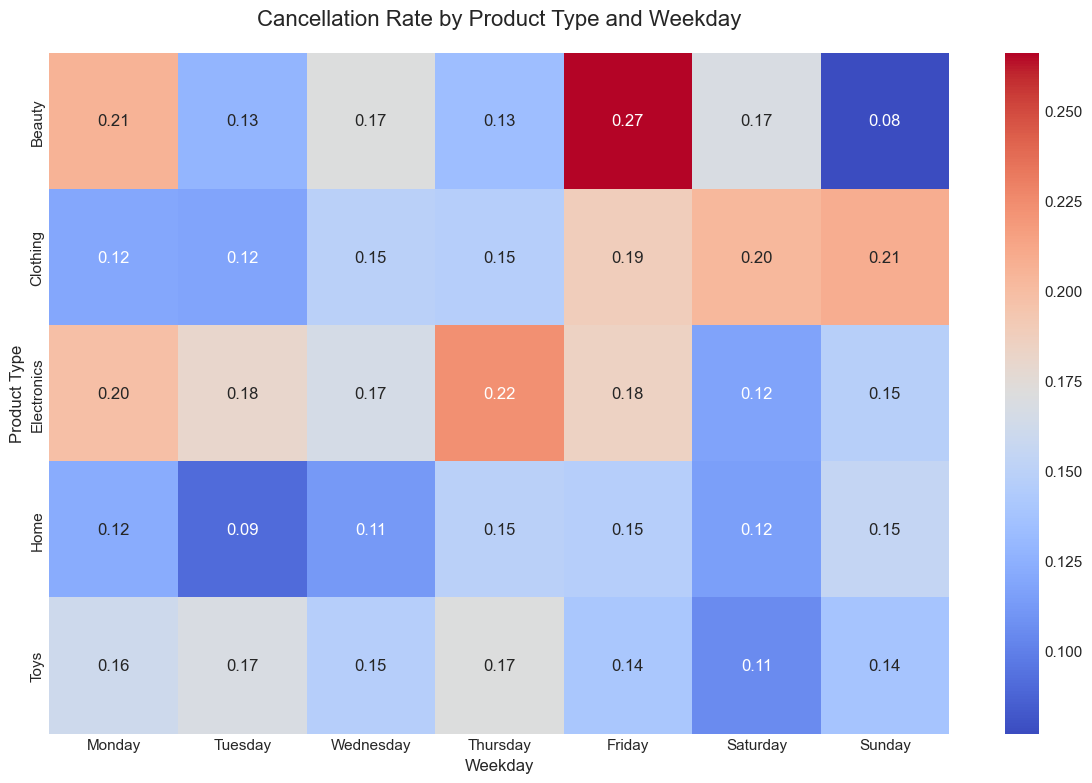

In [35]:
pivot_table_rate = df_cleaned.pivot_table(
    index='product_type',
    columns='order_weekday',
    values='cancelled',
    aggfunc='mean',
    fill_value=0
)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table_rate = pivot_table_rate[ordered_days]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_rate, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cancellation Rate by Product Type and Weekday', fontsize=16)
plt.xlabel('Weekday')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()

In [ ]:
# Clean the data to define df_cleaned (obrigatório antes de usar df_cleaned['cancelled'])
df_cleaned = df.dropna(subset=[
    'order_value', 'cancelled', 'cancellation_reason', 'device_type',
    'shipping_method', 'customer_tenure_days', 'product_type',
    'is_first_order', 'prior_cancellations', 'is_weekend'
])

# Select a subset of features
features_to_use = [
    'order_value', 'cancellation_reason', 'device_type', 'shipping_method',
    'customer_tenure_days', 'product_type', 'is_first_order',
    'prior_cancellations', 'is_weekend'
]

# Create a copy to avoid SettingWithCopyWarning
df_model = df_cleaned[features_to_use].copy()

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=[col for col in df_model.columns if df_model[col].dtype == 'object'], drop_first=True)

# Standardize numerical features
numerical_features = ['order_value', 'customer_tenure_days', 'prior_cancellations']
scaler = StandardScaler()
df_model[numerical_features] = scaler.fit_transform(df_model[numerical_features])

# Define features (X) and target (y)
X = df_model
y = df_cleaned['cancelled']
print(f"Dataframe for modeling has {X.shape[0]} rows and {X.shape[1]} columns.")
